In [ ]:
# Cell 1: Enhanced SPSS Parser with English Translation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re
import warnings
warnings.filterwarnings('ignore')

def parse_spss_with_translation(sps_file_path):
    """
    Parse SPSS syntax file and create comprehensive mappings with English translations
    """
    with open(sps_file_path, 'r', encoding='utf-8') as f:
        sps_content = f.read()
    
    # Extract variable labels
    variable_labels = {}
    var_label_pattern = r"VARIABLE LABELS\s+(\S+)\s+'([^']+)'"
    for match in re.finditer(var_label_pattern, sps_content):
        var_name = match.group(1)
        var_label = match.group(2)
        variable_labels[var_name] = var_label
    
    # Extract value labels
    value_labels = {}
    value_label_pattern = r"VALUE LABELS\s+(\S+)\s+((?:\s+\d+\s+'[^']+'\s*)+)\."
    
    for match in re.finditer(value_label_pattern, sps_content, re.MULTILINE):
        var_name = match.group(1)
        values_block = match.group(2)
        value_pairs = re.findall(r"(\d+)\s+'([^']+)'", values_block)
        value_labels[var_name] = {int(code): label.strip() for code, label in value_pairs}
    
    return variable_labels, value_labels

def create_translation_mappings():
    """
    Create comprehensive Norwegian to English translation mappings
    """
    
    # Role translations
    role_translations = {
        'Kraftsystemanalytiker': 'Power System Analyst',
        'Nettplanlegger': 'Network Planner',
        'Tilknytningsansvarlig': 'Connection Manager',
        'Driftsplanlegger': 'Operations Planner',
        'Driftskoordinator': 'Operations Coordinator',
        'Driftsoperatør': 'Operations Operator',
        'Feil- og hendelsesanalytiker': 'Incident Analyst',
        'Annet': 'Other'
    }
    
    # Decision type translations
    decision_translations = {
        'Tilknytninger og kundehenvendelser': 'Customer Connections & Inquiries',
        'Driftsplanlegging og/eller endringer av koblingsbildet': 'Operations Planning & Switching',
        'Nettplanlegging og prosjektering': 'Network Planning & Engineering',
        'Fastsettelse av grenseverdier': 'Limit Setting & Standards',
        'Metode- eller modellutvikling': 'Method & Model Development',
        'Øvrige relevante beslutningsprosesser': 'Other Decision Processes',
        'Ingen av disse': 'None of These'
    }
    
    # Analysis type translations
    analysis_translations = {
        'Avbruddsanalyser': 'Outage Analysis',
        'Analyser for driftsplanlegging og koordinering': 'Operations Planning Analysis',
        'Modellering av last, produksjon og/eller andre ressurser': 'Load & Generation Modeling',
        'Økonomiske analyser': 'Economic Analysis'
    }
    
    # Simulation type translations
    simulation_translations = {
        'Lastflytanalyser': 'Power Flow Analysis',
        'Tilstandsanalyser': 'State Analysis',
        'Stokastiske simuleringer': 'Stochastic Simulations',
        'Værsimulering': 'Weather Simulation',
        'Markedssimuleringer': 'Market Simulations',
        'Tidsseriesimuleringer': 'Time Series Simulations'
    }
    
    # Involvement level translations
    involvement_translations = {
        'Selvstendig ansvarlig / Hovedansvarlig': 'Fully Responsible',
        'Delvis ansvarlig /Utførende': 'Partially Responsible',
        'Moderat involvert /Konsulteres': 'Moderately Involved',
        'Minimalt involvert/Informeres': 'Minimally Involved',
        'Ikke involvert / Ikke relevant': 'Not Involved'
    }
    
    # Barrier translations
    barrier_translations = {
        'Resultatene er vanskelig å tolke eller er tvetydige': 'Results are difficult to interpret or ambiguous',
        'Datakvalitet': 'Data quality issues',
        'Våre interne retningslinjer er ikke tilpasset': 'Internal guidelines not adapted',
        'Analysene og beregning av indikatorer er tidkrevende': 'Analysis is time-consuming/complex',
        'Jeg har ikke tilstrekkelig støtte i verktøy': 'Insufficient tool support',
        'Jeg kjenner ikke godt nok til hvordan beregninger gjøres': 'Insufficient knowledge of calculations'
    }
    
    # Organization type translations
    org_translations = {
        'Regionalt nettselskap / DSO': 'Regional Grid Company / DSO',
        'Nasjonalt Nettselskap / TSO': 'National Grid Company / TSO',
        'Annet': 'Other'
    }
    
    # Education level translations
    education_translations = {
        'Grunnskole': 'Primary School',
        'Videregående skole': 'High School',
        'Teknisk fagskole': 'Technical College',
        'Universitets- eller høgskole, fire år eller mindre': 'University/College, 4 years or less',
        'Universitets- eller høgskole, mer enn fire år': 'University/College, more than 4 years'
    }
    
    return {
        'roles': role_translations,
        'decisions': decision_translations,
        'analysis': analysis_translations,
        'simulations': simulation_translations,
        'involvement': involvement_translations,
        'barriers': barrier_translations,
        'organizations': org_translations,
        'education': education_translations
    }

def translate_text(norwegian_text, translation_mappings):
    """
    Translate Norwegian text to English using translation mappings
    """
    # Try exact match first
    for category, translations in translation_mappings.items():
        if norwegian_text in translations:
            return translations[norwegian_text]
    
    # Try partial match
    for category, translations in translation_mappings.items():
        for norw, eng in translations.items():
            if norw in norwegian_text:
                return eng
    
    # If no translation found, return original text
    return norwegian_text

def create_comprehensive_mappings(sps_file_path):
    """
    Create comprehensive mappings from SPSS file with English translations
    """
    # Parse SPSS file
    variable_labels, value_labels = parse_spss_with_translation(sps_file_path)
    
    # Get translation mappings
    translation_mappings = create_translation_mappings()
    
    # Create comprehensive mapping structure
    mappings = {
        'variable_labels_norwegian': variable_labels,
        'value_labels_norwegian': value_labels,
        'variable_labels_english': {},
        'value_labels_english': {},
        'role_mappings': {},
        'decision_mappings': {},
        'involvement_mappings': {},
        'analysis_mappings': {},
        'simulation_mappings': {},
        'barrier_mappings': {},
        'software_mappings': {},
        'indicator_mappings': {}
    }
    
    # Create English translations for variable labels
    for var, label in variable_labels.items():
        mappings['variable_labels_english'][var] = translate_text(label, translation_mappings)
    
    # Create English translations for value labels
    for var, values in value_labels.items():
        mappings['value_labels_english'][var] = {}
        for code, label in values.items():
            mappings['value_labels_english'][var][code] = translate_text(label, translation_mappings)
    
    # Create specific category mappings
    for var, label in variable_labels.items():
        english_label = translate_text(label, translation_mappings)
        
        if var.startswith('Role_type.'):
            # Extract role name from label
            role_match = re.search(r'([A-Za-zæøåÆØÅ\s-]+)\s*\(', label)
            if role_match:
                role_name = role_match.group(1).strip()
                mappings['role_mappings'][var] = {
                    'norwegian': role_name,
                    'english': translate_text(role_name, translation_mappings),
                    'full_norwegian': label,
                    'full_english': english_label
                }
        
        elif var.startswith('decision_type') and not 'subtype' in var and not 'involvement' in var:
            mappings['decision_mappings'][var] = {
                'norwegian': label,
                'english': english_label
            }
        
        elif 'involvement.level' in var:
            mappings['involvement_mappings'][var] = {
                'norwegian': label,
                'english': english_label,
                'values_norwegian': value_labels.get(var, {}),
                'values_english': mappings['value_labels_english'].get(var, {})
            }
        
        elif var.startswith('analyze_type.'):
            mappings['analysis_mappings'][var] = {
                'norwegian': label,
                'english': english_label
            }
        
        elif var.startswith('simulation_type.'):
            mappings['simulation_mappings'][var] = {
                'norwegian': label,
                'english': english_label
            }
        
        elif 'barrieres' in var or 'barriers' in var:
            mappings['barrier_mappings'][var] = {
                'norwegian': label,
                'english': english_label,
                'values_norwegian': value_labels.get(var, {}),
                'values_english': mappings['value_labels_english'].get(var, {})
            }
        
        elif var.startswith('software_type.'):
            mappings['software_mappings'][var] = {
                'norwegian': label,
                'english': english_label
            }
        
        elif var.startswith('indicators_type.'):
            mappings['indicator_mappings'][var] = {
                'norwegian': label,
                'english': english_label,
                'values_norwegian': value_labels.get(var, {}),
                'values_english': mappings['value_labels_english'].get(var, {})
            }
    
    return mappings

# Load and create comprehensive mappings
sps_file_path = 'data/syntax.sps' 
COMPREHENSIVE_MAPPINGS = create_comprehensive_mappings(sps_file_path)

print("✅ SPSS file parsed and comprehensive mappings created")
print(f"   • Variable labels: {len(COMPREHENSIVE_MAPPINGS['variable_labels_norwegian'])}")
print(f"   • Value labels: {len(COMPREHENSIVE_MAPPINGS['value_labels_norwegian'])}")
print(f"   • Role mappings: {len(COMPREHENSIVE_MAPPINGS['role_mappings'])}")
print(f"   • Decision mappings: {len(COMPREHENSIVE_MAPPINGS['decision_mappings'])}")


✅ SPSS file parsed and comprehensive mappings created
   • Variable labels: 228
   • Value labels: 197
   • Role mappings: 7
   • Decision mappings: 8


In [ ]:
# Cell 2: Data Loading and Cleaning Pipeline
def load_and_clean_data(csv_file_path):
    """
    Complete data loading and cleaning pipeline using centralized mappings
    """
    print("🔧 Loading and cleaning questionnaire data...")
    
    # Load data
    df = pd.read_csv(csv_file_path, delimiter=';', encoding='utf-8')
    print(f"Original dataset shape: {df.shape}")
    
    # Step 1: Fix sub-alternatives logic
    df_fixed = df.copy()
    for main_decision, sub_cols in SUB_ALTERNATIVES_MAP.items():
        if main_decision in df_fixed.columns:
            mask_not_involved = df_fixed[main_decision] == 0
            for sub_col in sub_cols:
                if sub_col in df_fixed.columns:
                    df_fixed.loc[mask_not_involved, sub_col] = 0 # Filtering out sub-alternatives when main decision is not involved
    
    # Step 2: Fix involvement scale (invert 1-5 to 5-1)
    for col in INVOLVEMENT_COLUMNS:
        if col in df_fixed.columns:
            df_fixed[col] = 6 - df_fixed[col]
    
    print("✅ Data cleaning complete")
    print(f"   • Sub-alternatives logic fixed")
    print(f"   • Involvement scale corrected (5=Fully Responsible, 1=Not Involved)")
    
    return df_fixed

# Load and clean data
csv_file_path = 'data/results.csv'  # Update path
df_cleaned = load_and_clean_data(csv_file_path)


🔧 Loading and cleaning questionnaire data...
Original dataset shape: (24, 231)
✅ Data cleaning complete
   • Sub-alternatives logic fixed
   • Involvement scale corrected (5=Fully Responsible, 1=Not Involved)


In [ ]:
# Cell 2: Generate English SPSS Syntax File
def generate_english_spss_file(mappings, output_path='data/syntax_english.sps'):
    """
    Generate English version of SPSS syntax file for future questionnaire runs
    """
    
    english_spss_content = []
    english_spss_content.append("* Encoding: UTF-8.")
    english_spss_content.append("")
    english_spss_content.append("* Survey on reliability and capacity analysis in Norwegian grid companies - English Version")
    english_spss_content.append("")
    english_spss_content.append("* Define Variable Properties.")
    english_spss_content.append("")
    
    # Generate variable labels
    for var, english_label in mappings['variable_labels_english'].items():
        english_spss_content.append(f"*{var}.")
        english_spss_content.append("")
        english_spss_content.append(f"VARIABLE LABELS {var} '{english_label}'.")
        english_spss_content.append("")
        
        # Add value labels if they exist
        if var in mappings['value_labels_english']:
            english_spss_content.append(f"VALUE LABELS {var}")
            for code, label in mappings['value_labels_english'][var].items():
                english_spss_content.append(f"  {code} '{label}'")
            english_spss_content.append(".")
            english_spss_content.append("")
    
    english_spss_content.append("EXECUTE.")
    
    # Write to file
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write('\n'.join(english_spss_content))
    
    print(f"✅ English SPSS syntax file generated: {output_path}")
    
    return output_path

# Generate English SPSS file
english_spss_path = generate_english_spx|ss_file(COMPREHENSIVE_MAPPINGS)


✅ English SPSS syntax file generated: data/syntax_english.sps


In [5]:
# Cell 3: Data Loading and Cleaning Using SPSS Mappings
def load_and_clean_data_with_spss(csv_file_path, mappings):
    """
    Load and clean data using SPSS-derived mappings
    """
    print("🔧 Loading and cleaning data using SPSS mappings...")
    
    # Load data
    df = pd.read_csv(csv_file_path, delimiter=';', encoding='utf-8')
    print(f"Original dataset shape: {df.shape}")
    
    # Extract column lists from SPSS mappings
    role_columns = list(mappings['role_mappings'].keys())
    decision_columns = list(mappings['decision_mappings'].keys())
    involvement_columns = list(mappings['involvement_mappings'].keys())
    
    # Create sub-alternatives mapping from SPSS structure
    sub_alternatives_map = {}
    for var in mappings['variable_labels_norwegian']:
        if 'subtype' in var:
            # Extract main decision type
            main_match = re.match(r'(decision_type\.\d+)', var)
            if main_match:
                main_decision = main_match.group(1)
                if main_decision not in sub_alternatives_map:
                    sub_alternatives_map[main_decision] = []
                sub_alternatives_map[main_decision].append(var)
    
    # Step 1: Fix sub-alternatives logic using SPSS-derived mapping
    df_fixed = df.copy()
    for main_decision, sub_cols in sub_alternatives_map.items():
        if main_decision in df_fixed.columns:
            mask_not_involved = df_fixed[main_decision] == 0
            for sub_col in sub_cols:
                if sub_col in df_fixed.columns:
                    df_fixed.loc[mask_not_involved, sub_col] = 0
    
    # Step 2: Fix involvement scale (invert 1-5 to 5-1) based on SPSS value labels
    for col in involvement_columns:
        if col in df_fixed.columns:
            # Check if scale needs inversion based on SPSS value labels
            value_labels = mappings['value_labels_norwegian'].get(col, {})
            if value_labels and 1 in value_labels:
                # If 1 corresponds to high responsibility, invert
                if 'Selvstendig ansvarlig' in value_labels[1] or 'Hovedansvarlig' in value_labels[1]:
                    df_fixed[col] = 6 - df_fixed[col]
    
    print("✅ Data cleaning complete using SPSS mappings")
    print(f"   • Role columns identified: {len(role_columns)}")
    print(f"   • Decision columns identified: {len(decision_columns)}")
    print(f"   • Involvement columns identified: {len(involvement_columns)}")
    print(f"   • Sub-alternatives mappings: {len(sub_alternatives_map)}")
    
    return df_fixed, role_columns, decision_columns, involvement_columns, sub_alternatives_map

# Load and clean data
csv_file_path = 'data/results.csv'  # Update path
df_cleaned, role_columns, decision_columns, involvement_columns, sub_alternatives_map = load_and_clean_data_with_spss(
    csv_file_path, COMPREHENSIVE_MAPPINGS
)


🔧 Loading and cleaning data using SPSS mappings...
Original dataset shape: (24, 231)
✅ Data cleaning complete using SPSS mappings
   • Role columns identified: 7
   • Decision columns identified: 8
   • Involvement columns identified: 6
   • Sub-alternatives mappings: 0


In [6]:
# Cell 4: Analysis Functions Using SPSS Mappings
def create_role_involvement_matrix_from_spss(df, mappings):
    """
    Create role-involvement matrix using SPSS-derived mappings
    """
    role_columns = list(mappings['role_mappings'].keys())
    involvement_columns = list(mappings['involvement_mappings'].keys())
    
    existing_roles = [col for col in role_columns if col in df.columns]
    existing_involvement = [col for col in involvement_columns if col in df.columns]
    
    role_involvement_matrix = []
    
    for role in existing_roles:
        role_row = []
        for involvement_col in existing_involvement:
            has_role = df[role] == 1
            if has_role.sum() > 0:
                avg_involvement = df.loc[has_role, involvement_col].mean()
                role_row.append(avg_involvement)
            else:
                role_row.append(np.nan)
        role_involvement_matrix.append(role_row)
    
    # Create DataFrame with English labels
    involvement_df = pd.DataFrame(
        role_involvement_matrix,
        index=[mappings['role_mappings'][role]['english'] for role in existing_roles],
        columns=[mappings['involvement_mappings'][col]['english'] for col in existing_involvement]
    )
    
    return involvement_df, existing_roles, existing_involvement

def create_detailed_analysis_from_spss(df, existing_roles, existing_involvement, mappings):
    """
    Create detailed analysis using SPSS-derived mappings
    """
    detailed_analysis = []
    
    for role in existing_roles:
        for involvement_col in existing_involvement:
            if role in df.columns and involvement_col in df.columns:
                has_role = df[role] == 1
                role_count = has_role.sum()
                
                if role_count > 0:
                    involvement_levels = df.loc[has_role, involvement_col]
                    avg_involvement = involvement_levels.mean()
                    
                    # Count by involvement level using SPSS value labels
                    level_counts = {}
                    for level in range(1, 6):
                        count = (involvement_levels == level).sum()
                        percentage = (count / role_count) * 100 if role_count > 0 else 0
                        level_counts[level] = {'count': count, 'percentage': percentage}
                    
                    # Extract decision area number from involvement column
                    decision_match = re.search(r'decision_type(\d+)', involvement_col)
                    decision_area = decision_match.group(1) if decision_match else 'unknown'
                    
                    detailed_analysis.append({
                        'role': mappings['role_mappings'][role]['english'],
                        'role_norwegian': mappings['role_mappings'][role]['norwegian'],
                        'decision_area': decision_area,
                        'decision_english': mappings['involvement_mappings'][involvement_col]['english'],
                        'decision_norwegian': mappings['involvement_mappings'][involvement_col]['norwegian'],
                        'role_total': role_count,
                        'avg_involvement_level': avg_involvement,
                        'fully_responsible_pct': level_counts[5]['percentage'],
                        'partially_responsible_pct': level_counts[4]['percentage'],
                        'moderately_involved_pct': level_counts[3]['percentage'],
                        'minimally_involved_pct': level_counts[2]['percentage'],
                        'not_involved_pct': level_counts[1]['percentage']
                    })
    
    return pd.DataFrame(detailed_analysis)

# Create analysis data using SPSS mappings
involvement_df, existing_roles, existing_involvement = create_role_involvement_matrix_from_spss(
    df_cleaned, COMPREHENSIVE_MAPPINGS
)
detailed_df = create_detailed_analysis_from_spss(
    df_cleaned, existing_roles, existing_involvement, COMPREHENSIVE_MAPPINGS
)

print("✅ Analysis data created using SPSS mappings")
print(f"   • Involvement matrix shape: {involvement_df.shape}")
print(f"   • Detailed analysis records: {len(detailed_df)}")


✅ Analysis data created using SPSS mappings
   • Involvement matrix shape: (7, 6)
   • Detailed analysis records: 42


In [21]:
def create_involvement_levels_heatmap(involvement_df, save_plot=False, output_dir='plots/', figsize=(12, 8)):
    """
    Create standalone involvement levels heatmap
    """
    import os
    
    plt.figure(figsize=figsize)
    
    # Clean data
    involvement_clean = involvement_df.dropna(how='all', axis=0).dropna(how='all', axis=1)
    
    # Create heatmap
    sns.heatmap(involvement_clean, 
                annot=True, 
                fmt='.1f', 
                cmap='RdYlBu_r',
                center=3,
                vmin=1, 
                vmax=5,
                cbar_kws={'label': 'Involvement Level\n(5=Fully Responsible, 1=Not Involved)'},
                linewidths=1)
    
    plt.title('Role-Decision Involvement Levels', fontsize=16, fontweight='bold')
    plt.xlabel('Decision Areas', fontsize=12)
    plt.ylabel('Roles', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Save if requested
    if save_plot:
        os.makedirs(output_dir, exist_ok=True)
        filename = os.path.join(output_dir, 'involvement_levels_heatmap.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {filename}")
    
    plt.show()
    return involvement_clean

def create_high_responsibility_heatmap(involvement_df, save_plot=False, output_dir='plots/', figsize=(12, 8)):
    """
    Create standalone high responsibility focus heatmap
    """
    import os
    
    plt.figure(figsize=figsize)
    
    # Clean and filter data
    involvement_clean = involvement_df.dropna(how='all', axis=0).dropna(how='all', axis=1)
    high_resp_only = involvement_clean.copy()
    high_resp_only[high_resp_only < 4.0] = np.nan
    
    # Create heatmap
    sns.heatmap(high_resp_only,
                annot=True,
                fmt='.1f',
                cmap='Reds',
                vmin=4.0,
                vmax=5.0,
                cbar_kws={'label': 'High Responsibility\n(4.0-5.0 only)'},
                linewidths=1)
    
    plt.title('High Responsibility Focus (≥4.0)', fontsize=16, fontweight='bold')
    plt.xlabel('Decision Areas', fontsize=12)
    plt.ylabel('Roles', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Save if requested
    if save_plot:
        os.makedirs(output_dir, exist_ok=True)
        filename = os.path.join(output_dir, 'high_responsibility_heatmap.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {filename}")
    
    plt.show()
    return high_resp_only

def create_fully_responsible_heatmap(detailed_df, mappings, save_plot=False, output_dir='plots/', figsize=(12, 8)):
    """
    Create standalone fully responsible percentage heatmap
    """
    import os
    
    plt.figure(figsize=figsize)
    
    # Create pivot table
    fully_resp_matrix = detailed_df.pivot_table(
        values='fully_responsible_pct', 
        index='role', 
        columns='decision_area', 
        fill_value=0
    )
    
    # Apply decision labels if available
    if 'decision_mappings' in mappings:
        column_labels = []
        for col in fully_resp_matrix.columns:
            decision_key = f'decision_type.{col}'
            if decision_key in mappings['decision_mappings']:
                column_labels.append(mappings['decision_mappings'][decision_key]['english'])
            else:
                column_labels.append(f'Decision {col}')
        fully_resp_matrix.columns = column_labels
    
    # Create heatmap
    sns.heatmap(fully_resp_matrix, 
                annot=True, 
                fmt='.0f', 
                cmap='Oranges',
                cbar_kws={'label': 'Percentage (%)'},
                linewidths=1)
    
    plt.title('Fully Responsible Distribution (%)', fontsize=16, fontweight='bold')
    plt.xlabel('Decision Areas', fontsize=12)
    plt.ylabel('Roles', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Save if requested
    if save_plot:
        os.makedirs(output_dir, exist_ok=True)
        filename = os.path.join(output_dir, 'fully_responsible_heatmap.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {filename}")
    
    plt.show()
    return fully_resp_matrix

def create_role_specialization_heatmap(involvement_df, save_plot=False, output_dir='plots/', figsize=(12, 8)):
    """
    Create standalone role specialization metrics heatmap
    """
    import os
    
    plt.figure(figsize=figsize)
    
    # Clean data and calculate specialization metrics
    involvement_clean = involvement_df.dropna(how='all', axis=0).dropna(how='all', axis=1)
    
    specialization_data = []
    for role in involvement_clean.index:
        role_values = involvement_clean.loc[role].dropna()
        if len(role_values) > 1:
            specialization_data.append({
                'Role': role,
                'Avg Involvement': role_values.mean(),
                'Specialization': role_values.std(),
                'Max Involvement': role_values.max(),
                'Range': role_values.max() - role_values.min()
            })
    
    if specialization_data:
        spec_df = pd.DataFrame(specialization_data).set_index('Role')
        
        # Create heatmap
        sns.heatmap(spec_df, 
                    annot=True, 
                    fmt='.2f', 
                    cmap='viridis',
                    cbar_kws={'label': 'Score'},
                    linewidths=1)
        
        plt.title('Role Specialization Metrics', fontsize=16, fontweight='bold')
        plt.xlabel('Metrics', fontsize=12)
        plt.ylabel('Roles', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        
        # Save if requested
        if save_plot:
            os.makedirs(output_dir, exist_ok=True)
            filename = os.path.join(output_dir, 'role_specialization_heatmap.png')
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"✅ Saved: {filename}")
        
        plt.show()
        return spec_df
    else:
        plt.close()
        print("⚠️ No specialization data available")
        return None


In [26]:
def create_sankey_diagram(detailed_df, mappings, save_plot=False, output_dir='plots/', filename='sankey_diagram.png'):
    """
    Create standalone Sankey diagram
    """
    import os
    
    # Calculate weighted involvement (same as before)
    weighted_data = detailed_df.groupby(['role', 'decision_area']).agg({
        'avg_involvement_level': 'mean',
        'role_total': 'first'
    }).reset_index()
    
    frequency = detailed_df.groupby(['role', 'decision_area']).size().reset_index(name='frequency')
    weighted_data = pd.merge(weighted_data, frequency, on=['role', 'decision_area'])
    
    weighted_data['weighted_involvement'] = (
        weighted_data['frequency'] * weighted_data['avg_involvement_level']
    )
    
    max_weight = weighted_data['weighted_involvement'].max()
    weighted_data['weighted_involvement_norm'] = (
        weighted_data['weighted_involvement'] / max_weight if max_weight > 0 else 0
    )
    
    # Add English decision names
    weighted_data['decision_english'] = weighted_data['decision_area'].map(
        lambda x: next((mappings['involvement_mappings'][col]['english'] 
                       for col in mappings['involvement_mappings'] 
                       if f'decision_type{x}' in col), f"Decision {x}")
    )
    
    # Create Sankey (same logic as before)
    roles = weighted_data['role'].unique().tolist()
    decisions = weighted_data['decision_english'].unique().tolist()
    involvement_categories = ['High Involvement (4-5)', 'Moderate Involvement (3-4)', 'Low Involvement (1-3)']
    
    all_nodes = roles + decisions + involvement_categories
    node_dict = {node: idx for idx, node in enumerate(all_nodes)}
    
    def get_involvement_color(level):
        if level >= 4.5:
            return 'rgba(220, 20, 60, 0.6)'
        elif level >= 3.5:
            return 'rgba(255, 140, 0, 0.6)'
        elif level >= 2.5:
            return 'rgba(70, 130, 180, 0.6)'
        else:
            return 'rgba(169, 169, 169, 0.6)'
    
    def categorize_involvement(level):
        if level >= 4.0:
            return 'High Involvement (4-5)'
        elif level >= 3.0:
            return 'Moderate Involvement (3-4)'
        else:
            return 'Low Involvement (1-3)'
    
    # Create links
    links = []
    for _, row in weighted_data.iterrows():
        if row['weighted_involvement'] > 0:
            # Role → Decision link
            links.append({
                'source': node_dict[row['role']],
                'target': node_dict[row['decision_english']],
                'value': row['weighted_involvement'],
                'color': get_involvement_color(row['avg_involvement_level'])
            })
            
            # Decision → Involvement Level link
            involvement_category = categorize_involvement(row['avg_involvement_level'])
            links.append({
                'source': node_dict[row['decision_english']],
                'target': node_dict[involvement_category],
                'value': row['weighted_involvement'],
                'color': get_involvement_color(row['avg_involvement_level'])
            })
    
    # Node colors
    node_colors = []
    for node in all_nodes:
        if node in roles:
            node_colors.append('lightblue')
        elif node in decisions:
            node_colors.append('lightcoral')
        else:
            node_colors.append('lightgreen')
    
    # Create Sankey
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_nodes,
            color=node_colors
        ),
        link=dict(
            source=[link['source'] for link in links],
            target=[link['target'] for link in links],
            value=[link['value'] for link in links],
            color=[link['color'] for link in links]
        )
    )])
    
    fig.update_layout(
        title_text="Role-Decision-Involvement Flow Analysis<br>Norwegian Grid Companies",
        font_size=12,
        height=700,
        width=1200
    )
    
    # Save if requested
    if save_plot:
        os.makedirs(output_dir, exist_ok=True)
        full_path = os.path.join(output_dir, filename)
        fig.write_html(full_path)
        print(f"✅ Sankey diagram saved as HTML: {full_path}")
    
    fig.show()
    return fig


In [27]:
def create_all_individual_plots(involvement_df, detailed_df, mappings, save_plots=False, output_dir='plots/'):
    """
    Create all individual plots with optional saving
    """
    print("🎨 Creating individual plots...")
    
    # Create each plot individually
    involvement_clean = create_involvement_levels_heatmap(
        involvement_df, save_plot=save_plots, output_dir=output_dir
    )
    
    high_resp_data = create_high_responsibility_heatmap(
        involvement_df, save_plot=save_plots, output_dir=output_dir
    )
    
    fully_resp_matrix = create_fully_responsible_heatmap(
        detailed_df, mappings, save_plot=save_plots, output_dir=output_dir
    )
    
    spec_df = create_role_specialization_heatmap(
        involvement_df, save_plot=save_plots, output_dir=output_dir
    )
    
    sankey_fig = create_sankey_diagram(
        detailed_df, mappings, save_plot=save_plots, output_dir=output_dir
    )
    
    if save_plots:
        print(f"\n✅ All plots saved to: {output_dir}")
    
    return {
        'involvement_clean': involvement_clean,
        'high_resp_data': high_resp_data,
        'fully_resp_matrix': fully_resp_matrix,
        'specialization_df': spec_df,
        'sankey_fig': sankey_fig
    }


🎨 Creating individual plots...
✅ Saved: norwegian_grid_analysis/involvement_levels_heatmap.png


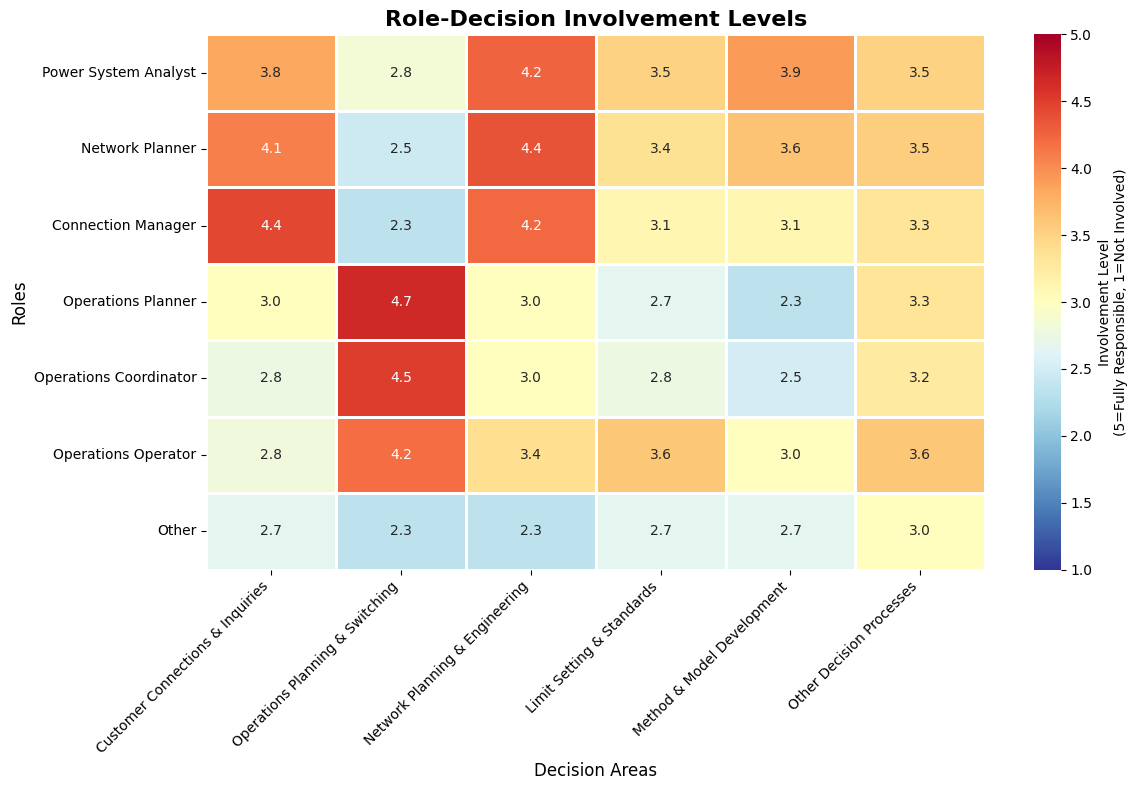

✅ Saved: norwegian_grid_analysis/high_responsibility_heatmap.png


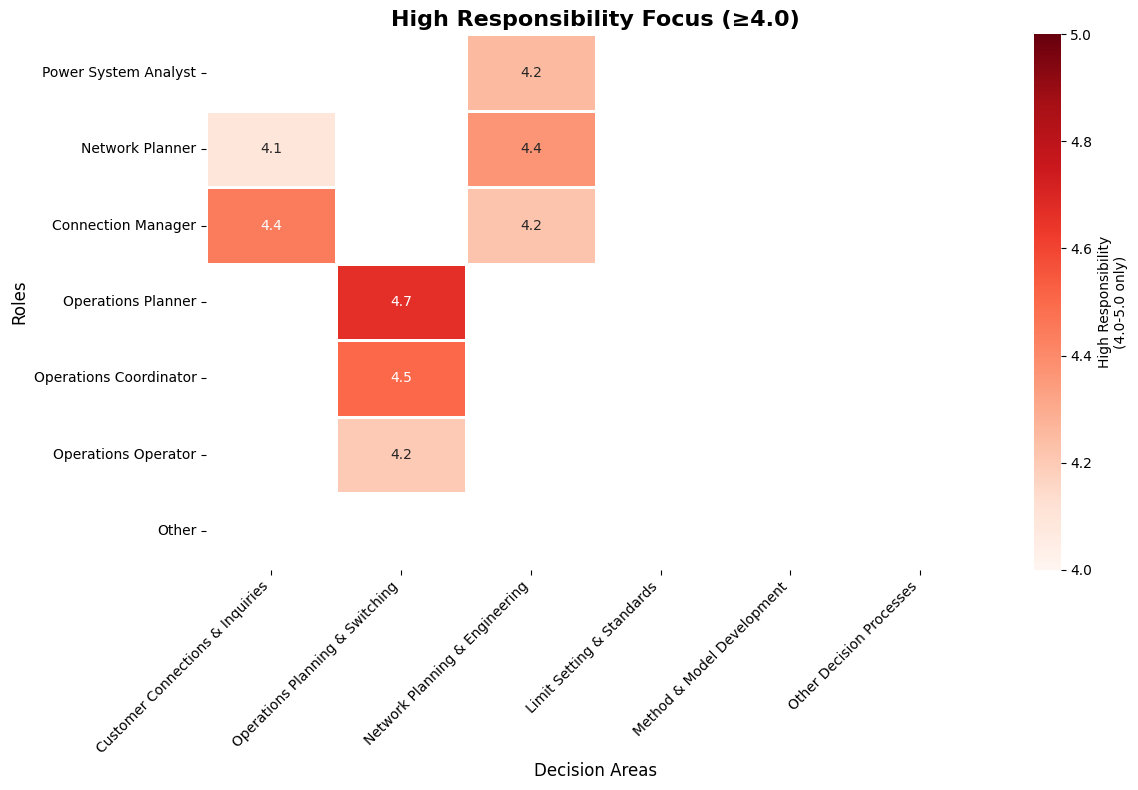

✅ Saved: norwegian_grid_analysis/fully_responsible_heatmap.png


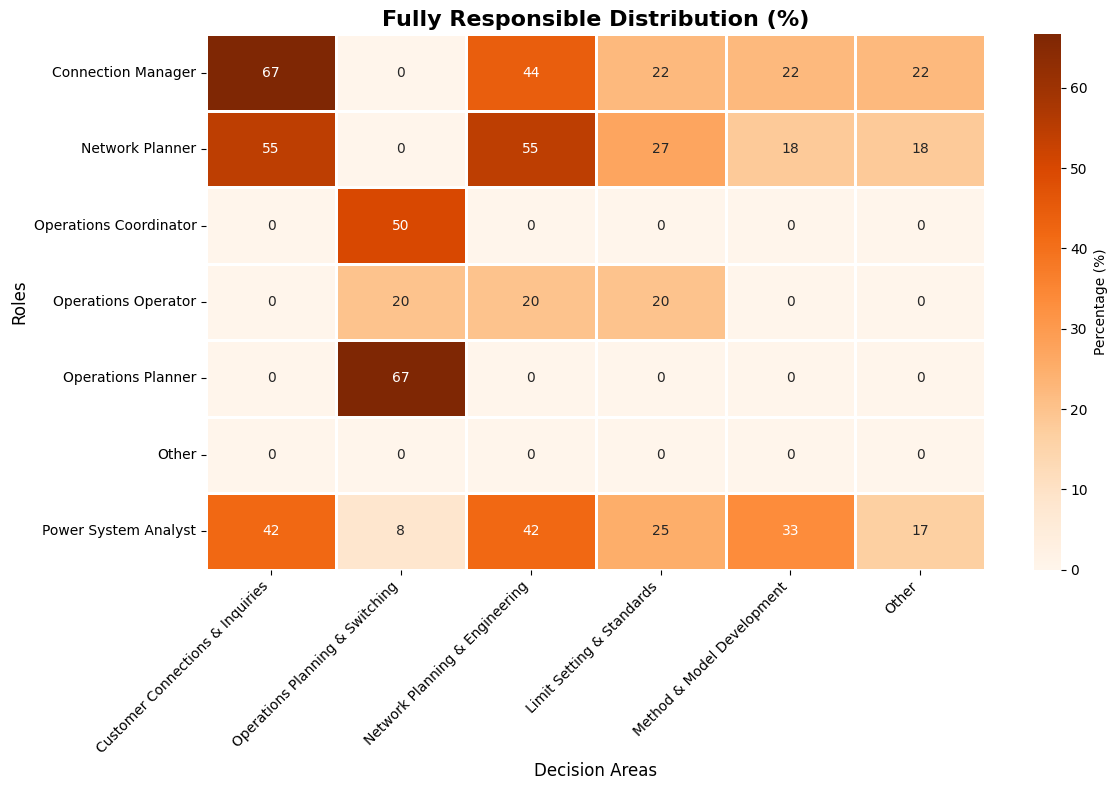

✅ Saved: norwegian_grid_analysis/role_specialization_heatmap.png


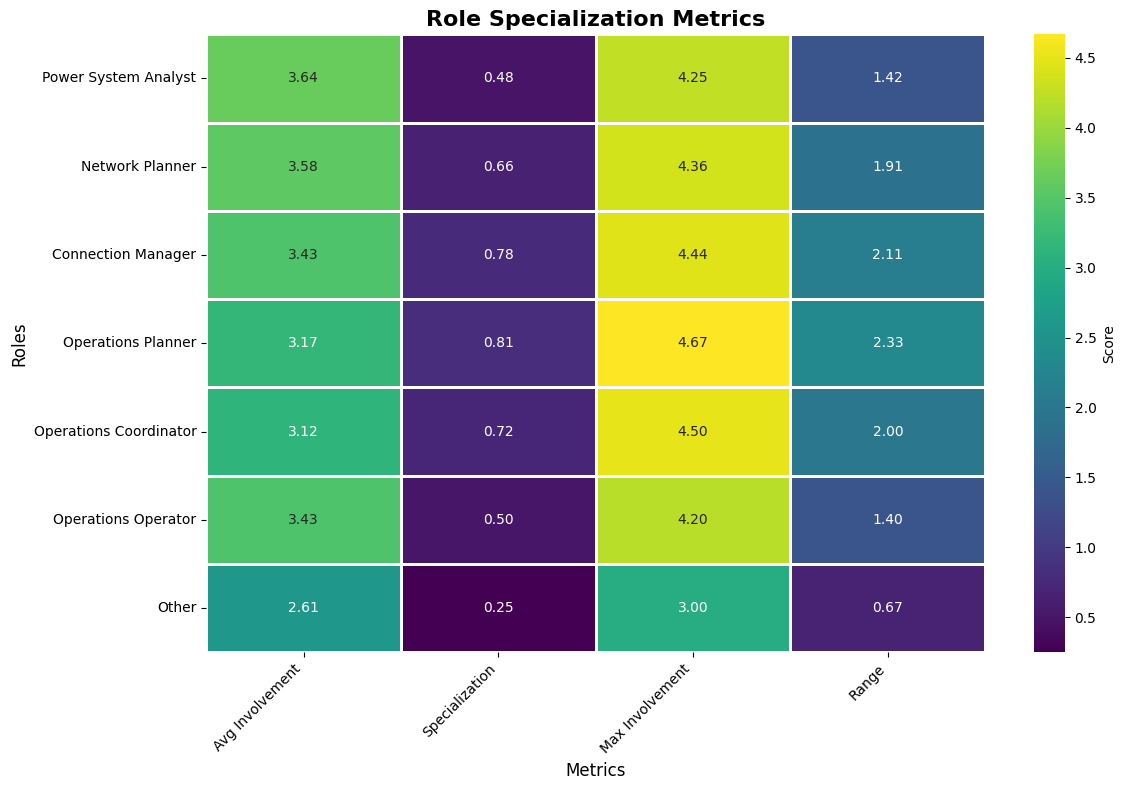

✅ Sankey diagram saved as HTML: norwegian_grid_analysis/sankey_diagram.png



✅ All plots saved to: norwegian_grid_analysis/


In [28]:
# Example 1: Create all plots for viewing only
#results = create_all_individual_plots(involvement_df, detailed_df, COMPREHENSIVE_MAPPINGS, save_plots=False)

# Example 2: Create and save all plots
results = create_all_individual_plots(involvement_df,detailed_df, COMPREHENSIVE_MAPPINGS,save_plots=True,output_dir='norwegian_grid_analysis/')

# Example 3: Create individual plots one by one
#involvement_data = create_involvement_levels_heatmap(involvement_df, save_plot=True, output_dir='individual_plots/')

#high_resp_data = create_high_responsibility_heatmap(involvement_df, save_plot=True, output_dir='individual_plots/')

# Example 4: Create only specific plots
#sankey_fig = create_sankey_diagram(detailed_df,COMPREHENSIVE_MAPPINGS,save_plot=True,output_dir='flow_diagrams/',filename='norwegian_grid_flow.png')


In [ ]:
def create_simplified_sankey_with_grouping(df_cleaned, mappings, save_plot=False, output_dir='plots/', filename='simplified_sankey.html'):
    """
    Create simplified Sankey with short labels and grouped alternatives
    """
    import os
    import plotly.graph_objects as go
    import pandas as pd
    import numpy as np
    
    # Step 1: Create simplified node structure with short labels
    simplified_nodes = create_simplified_node_structure(df_cleaned, mappings)
    
    # Step 2: Create grouped flow data
    grouped_flows = create_grouped_flow_data(df_cleaned, mappings)
    
    # Step 3: Build Sankey with clean structure
    fig = build_clean_sankey(simplified_nodes, grouped_flows)
    
    # Save as HTML
    if save_plot:
        os.makedirs(output_dir, exist_ok=True)
        full_path = os.path.join(output_dir, filename)
        fig.write_html(full_path)
        print(f"✅ Simplified Sankey saved: {full_path}")
    
    fig.show()
    return fig

def create_simplified_node_structure(df_cleaned, mappings):
    """
    Create simplified node structure with short labels and logical grouping
    """
    
    # Simplified role labels
    role_short_labels = {
        'System Analyst': 'Analyst',
        'Network Planner': 'Planner', 
        'Connection Manager': 'Conn Mgr',
        'Operations Planner': 'Ops Plan',
        'Operations Coordinator': 'Ops Coord',
        'Operations Operator': 'Operator',
        'Incident Analyst': 'Incident',
        'Other': 'Other'
    }
    
    # Simplified decision labels
    decision_short_labels = {
        'Customer Connections & Inquiries': 'Customer',
        'Operations Planning & Switching': 'Operations', 
        'Network Planning & Engineering': 'Planning',
        'Limit Setting & Standards': 'Standards',
        'Method & Model Development': 'Methods',
        'Other Decision Processes': 'Other Dec'
    }
    
    # Grouped analysis types
    analysis_groups = {
        'Reliability Analysis': ['Outage Analysis', 'Incident Analysis'],
        'Operations Analysis': ['Operations Planning Analysis', 'State Analysis'],
        'System Modeling': ['Load & Generation Modeling', 'Network Modeling'],
        'Economic Analysis': ['Economic Analysis', 'Market Analysis']
    }
    
    # Grouped simulation types  
    simulation_groups = {
        'Power Flow': ['Power Flow Analysis', 'Load Flow'],
        'Stochastic': ['Stochastic Simulations', 'Monte Carlo'],
        'Time Series': ['Time Series Simulations', 'Historical Analysis'],
        'Weather/Market': ['Weather Simulation', 'Market Simulations']
    }
    
    # Grouped uncertainty methods
    uncertainty_groups = {
        'Probabilistic': ['Probabilistic Analysis', 'Statistical Methods'],
        'Scenario-based': ['Scenario Analysis', 'What-if Analysis'], 
        'Historical': ['Historical Data', 'Trend Analysis'],
        'Expert-based': ['Expert Judgment', 'Qualitative Assessment']
    }
    
    return {
        'roles': role_short_labels,
        'decisions': decision_short_labels,
        'analysis_groups': analysis_groups,
        'simulation_groups': simulation_groups,
        'uncertainty_groups': uncertainty_groups
    }

def create_grouped_flow_data(df_cleaned, mappings):
    """
    Create flow data with grouped alternatives
    """
    flows = []
    
    # Role → Decision flows
    role_decision_flows = calculate_role_decision_flows(df_cleaned, mappings)
    flows.extend(role_decision_flows)
    
    # Decision → Analysis Group flows
    decision_analysis_flows = calculate_decision_analysis_flows(df_cleaned, mappings)
    flows.extend(decision_analysis_flows)
    
    # Analysis Group → Simulation Group flows
    analysis_simulation_flows = calculate_analysis_simulation_flows(df_cleaned, mappings)
    flows.extend(analysis_simulation_flows)
    
    # Simulation Group → Uncertainty Group flows
    simulation_uncertainty_flows = calculate_simulation_uncertainty_flows(df_cleaned, mappings)
    flows.extend(simulation_uncertainty_flows)
    
    return flows

def calculate_role_decision_flows(df_cleaned, mappings):
    """
    Calculate simplified role to decision flows
    """
    flows = []
    
    # Get role and decision columns
    role_columns = [col for col in mappings['role_mappings'].keys() if col in df_cleaned.columns]
    decision_columns = [col for col in mappings['decision_mappings'].keys() if col in df_cleaned.columns]
    
    # Create flow matrix
    for role_col in role_columns:
        for decision_col in decision_columns:
            # Count respondents with both role and decision
            both_count = ((df_cleaned[role_col] == 1) & (df_cleaned[decision_col] == 1)).sum()
            
            if both_count > 0:
                role_name = mappings['role_mappings'][role_col]['english']
                decision_name = mappings['decision_mappings'][decision_col]['english']
                
                # Apply short labels
                role_short = get_short_role_label(role_name)
                decision_short = get_short_decision_label(decision_name)
                
                flows.append({
                    'source': role_short,
                    'target': decision_short,
                    'value': both_count,
                    'source_type': 'role',
                    'target_type': 'decision'
                })
    
    return flows

def calculate_decision_analysis_flows(df_cleaned, mappings):
    """
    Calculate decision to grouped analysis flows
    """
    flows = []
    
    # Analysis grouping logic
    analysis_mapping = {
        'analyze_type.1': 'Reliability Analysis',  # Outage analysis
        'analyze_type.2': 'Operations Analysis',   # Operations planning
        'analyze_type.3': 'System Modeling',       # Load/generation modeling
        'analyze_type.4': 'Economic Analysis'      # Economic analysis
    }
    
    decision_columns = [col for col in mappings['decision_mappings'].keys() if col in df_cleaned.columns]
    analysis_columns = [col for col in analysis_mapping.keys() if col in df_cleaned.columns]
    
    for decision_col in decision_columns:
        for analysis_col in analysis_columns:
            # Count respondents using both decision type and analysis type
            both_count = ((df_cleaned[decision_col] == 1) & (df_cleaned[analysis_col] == 1)).sum()
            
            if both_count > 0:
                decision_name = mappings['decision_mappings'][decision_col]['english']
                decision_short = get_short_decision_label(decision_name)
                analysis_group = analysis_mapping[analysis_col]
                
                flows.append({
                    'source': decision_short,
                    'target': analysis_group,
                    'value': both_count,
                    'source_type': 'decision',
                    'target_type': 'analysis_group'
                })
    
    return flows

def calculate_analysis_simulation_flows(df_cleaned, mappings):
    """
    Calculate analysis group to simulation group flows
    """
    flows = []
    
    # Simulation grouping logic
    simulation_mapping = {
        'simulation_type.1': 'Power Flow',      # Power flow analysis
        'simulation_type.2': 'Power Flow',      # State analysis
        'simulation_type.3': 'Stochastic',      # Stochastic simulations
        'simulation_type.4': 'Weather/Market',  # Weather simulation
        'simulation_type.5': 'Weather/Market',  # Market simulations
        'simulation_type.6': 'Time Series'      # Time series simulations
    }
    
    analysis_mapping = {
        'analyze_type.1': 'Reliability Analysis',
        'analyze_type.2': 'Operations Analysis',
        'analyze_type.3': 'System Modeling',
        'analyze_type.4': 'Economic Analysis'
    }
    
    for analysis_col, analysis_group in analysis_mapping.items():
        if analysis_col in df_cleaned.columns:
            for sim_col, sim_group in simulation_mapping.items():
                if sim_col in df_cleaned.columns:
                    # Count respondents using both analysis and simulation
                    both_count = ((df_cleaned[analysis_col] == 1) & (df_cleaned[sim_col] == 1)).sum()
                    
                    if both_count > 0:
                        flows.append({
                            'source': analysis_group,
                            'target': sim_group,
                            'value': both_count,
                            'source_type': 'analysis_group',
                            'target_type': 'simulation_group'
                        })
    
    return flows

def calculate_simulation_uncertainty_flows(df_cleaned, mappings):
    """
    Calculate simulation group to uncertainty group flows
    """
    flows = []
    
    # Uncertainty grouping based on questionnaire structure
    uncertainty_mapping = {
        'analyze_type1_uncertainty.1': 'Probabilistic',  # Probabilistic methods
        'analyze_type1_uncertainty.2': 'Scenario-based', # Scenario analysis
        'analyze_type1_uncertainty.3': 'Historical',     # Historical data
        'analyze_type1_uncertainty.4': 'Expert-based',   # Expert judgment
        'simulation_uncertainty.1': 'Probabilistic',
        'simulation_uncertainty.2': 'Scenario-based',
        'simulation_uncertainty.3': 'Historical',
        'simulation_uncertainty.4': 'Expert-based'
    }
    
    simulation_mapping = {
        'simulation_type.1': 'Power Flow',
        'simulation_type.2': 'Power Flow',
        'simulation_type.3': 'Stochastic',
        'simulation_type.4': 'Weather/Market',
        'simulation_type.5': 'Weather/Market',
        'simulation_type.6': 'Time Series'
    }
    
    for sim_col, sim_group in simulation_mapping.items():
        if sim_col in df_cleaned.columns:
            for unc_col, unc_group in uncertainty_mapping.items():
                if unc_col in df_cleaned.columns:
                    # Count respondents using both simulation and uncertainty method
                    both_count = ((df_cleaned[sim_col] == 1) & (df_cleaned[unc_col] == 1)).sum()
                    
                    if both_count > 0:
                        flows.append({
                            'source': sim_group,
                            'target': unc_group,
                            'value': both_count,
                            'source_type': 'simulation_group',
                            'target_type': 'uncertainty_group'
                        })
    
    return flows

def get_short_role_label(role_name):
    """Get short label for role"""
    short_labels = {
        'Power System Analyst': 'Analyst',
        'Network Planner': 'Planner',
        'Connection Manager': 'Conn Mgr',
        'Operations Planner': 'Ops Plan',
        'Operations Coordinator': 'Ops Coord',
        'Operations Operator': 'Operator',
        'Incident Analyst': 'Incident',
        'Other': 'Other'
    }
    return short_labels.get(role_name, role_name[:8])

def get_short_decision_label(decision_name):
    """Get short label for decision"""
    short_labels = {
        'Customer Connections & Inquiries': 'Customer',
        'Operations Planning & Switching': 'Operations',
        'Network Planning & Engineering': 'Planning',
        'Limit Setting & Standards': 'Standards',
        'Method & Model Development': 'Methods',
        'Other Decision Processes': 'Other'
    }
    return short_labels.get(decision_name, decision_name[:8])

def build_clean_sankey(simplified_nodes, grouped_flows):
    """
    Build clean Sankey diagram with simplified structure
    """
    # Create comprehensive node list
    all_nodes = []
    node_colors = []
    
    # Add role nodes
    role_nodes = ['Analyst', 'Planner', 'Conn Mgr', 'Ops Plan', 'Ops Coord', 'Operator', 'Incident', 'Other']
    all_nodes.extend(role_nodes)
    node_colors.extend(['lightblue'] * len(role_nodes))
    
    # Add decision nodes
    decision_nodes = ['Customer', 'Operations', 'Planning', 'Standards', 'Methods', 'Other']
    all_nodes.extend(decision_nodes)
    node_colors.extend(['lightcoral'] * len(decision_nodes))
    
    # Add analysis group nodes
    analysis_nodes = ['Reliability Analysis', 'Operations Analysis', 'System Modeling', 'Economic Analysis']
    all_nodes.extend(analysis_nodes)
    node_colors.extend(['lightgreen'] * len(analysis_nodes))
    
    # Add simulation group nodes
    simulation_nodes = ['Power Flow', 'Stochastic', 'Time Series', 'Weather/Market']
    all_nodes.extend(simulation_nodes)
    node_colors.extend(['lightyellow'] * len(simulation_nodes))
    
    # Add uncertainty group nodes
    uncertainty_nodes = ['Probabilistic', 'Scenario-based', 'Historical', 'Expert-based']
    all_nodes.extend(uncertainty_nodes)
    node_colors.extend(['lavender'] * len(uncertainty_nodes))
    
    # Create node mapping
    node_dict = {node: idx for idx, node in enumerate(all_nodes)}
    
    # Create links from flows
    links = []
    for flow in grouped_flows:
        if flow['source'] in node_dict and flow['target'] in node_dict:
            links.append({
                'source': node_dict[flow['source']],
                'target': node_dict[flow['target']],
                'value': flow['value'],
                'color': get_flow_color_by_type(flow['source_type'])
            })
    
    # Create Sankey
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_nodes,
            color=node_colors
        ),
        link=dict(
            source=[link['source'] for link in links],
            target=[link['target'] for link in links],
            value=[link['value'] for link in links],
            color=[link['color'] for link in links]
        )
    )])
    
    fig.update_layout(
        title_text="Simplified Role-Decision-Method-Uncertainty Flow<br>" +
                  "Norwegian Grid Companies (Grouped & Short Labels)",
        font_size=11,
        height=700,
        width=1200
    )
    
    return fig

def get_flow_color_by_type(source_type):
    """Get flow color based on source type"""
    colors = {
        'role': 'rgba(70, 130, 180, 0.6)',
        'decision': 'rgba(255, 140, 0, 0.6)',
        'analysis_group': 'rgba(144, 238, 144, 0.6)',
        'simulation_group': 'rgba(255, 255, 0, 0.6)'
    }
    return colors.get(source_type, 'rgba(128, 128, 128, 0.6)')


In [34]:
# Create simplified Sankey with grouping
simplified_fig = create_simplified_sankey_with_grouping(
    df_cleaned, 
    COMPREHENSIVE_MAPPINGS,
    save_plot=True,
    output_dir='simplified_analysis/',
    filename='clean_grouped_sankey.html'
)


✅ Simplified Sankey saved: simplified_analysis/clean_grouped_sankey.html


In [35]:
def create_enhanced_sankey_diagram(detailed_df, mappings, save_plot=False, output_dir='plots/', filename='enhanced_sankey_diagram.png'):
    """
    Create enhanced Sankey diagram with improved readability, headers, and granularity
    """
    import os
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    # Calculate weighted involvement with more detailed breakdown
    weighted_data = detailed_df.groupby(['role', 'decision_area']).agg({
        'avg_involvement_level': 'mean',
        'role_total': 'first',
        'fully_responsible_pct': 'mean',
        'partially_responsible_pct': 'mean',
        'moderately_involved_pct': 'mean'
    }).reset_index()
    
    frequency = detailed_df.groupby(['role', 'decision_area']).size().reset_index(name='frequency')
    weighted_data = pd.merge(weighted_data, frequency, on=['role', 'decision_area'])
    
    # Enhanced weighted involvement calculation
    weighted_data['weighted_involvement'] = (
        weighted_data['frequency'] * weighted_data['avg_involvement_level']
    )
    
    max_weight = weighted_data['weighted_involvement'].max()
    weighted_data['weighted_involvement_norm'] = (
        weighted_data['weighted_involvement'] / max_weight if max_weight > 0 else 0
    )
    
    # Add detailed decision categories with modeling/simulation granularity
    def get_detailed_decision_category(decision_area, mappings):
        """Get detailed decision categories with modeling/simulation breakdown"""
        decision_map = {
            '1': 'Customer\nConnections',
            '2': 'Operations\nPlanning', 
            '3': 'Network\nPlanning',
            '4': 'Standards &\nLimits',
            '5': 'Method\nDevelopment',
            '6': 'Other\nDecisions'
        }
        
        # Add modeling and simulation subcategories for decision type 5
        if decision_area == '5':
            # You can expand this based on your sub-question data
            modeling_subcategories = [
                'Load Modeling',
                'Network Modeling', 
                'Economic Modeling',
                'Stochastic Modeling',
                'Power Flow Analysis',
                'Reliability Modeling'
            ]
            return decision_map.get(decision_area, f"Decision {decision_area}")
        
        return decision_map.get(decision_area, f"Decision {decision_area}")
    
    weighted_data['decision_detailed'] = weighted_data['decision_area'].apply(
        lambda x: get_detailed_decision_category(x, mappings)
    )
    
    # Create more granular involvement categories
    def categorize_involvement_detailed(avg_level, fully_pct, partially_pct, moderately_pct):
        """Create more nuanced involvement categories"""
        if avg_level >= 4.5 or fully_pct > 50:
            return 'Fully Responsible\n(Primary Owner)'
        elif avg_level >= 4.0 or fully_pct > 25:
            return 'Highly Responsible\n(Key Contributor)'
        elif avg_level >= 3.5 or partially_pct > 30:
            return 'Partially Responsible\n(Active Participant)'
        elif avg_level >= 3.0 or moderately_pct > 25:
            return 'Moderately Involved\n(Consulted)'
        elif avg_level >= 2.0:
            return 'Minimally Involved\n(Informed)'
        else:
            return 'Not Involved\n(No Role)'
    
    weighted_data['involvement_detailed'] = weighted_data.apply(
        lambda row: categorize_involvement_detailed(
            row['avg_involvement_level'],
            row['fully_responsible_pct'],
            row['partially_responsible_pct'], 
            row['moderately_involved_pct']
        ), axis=1
    )
    
    # Prepare enhanced node structure with headers
    roles = sorted(weighted_data['role'].unique().tolist())
    decisions = sorted(weighted_data['decision_detailed'].unique().tolist())
    involvement_levels = [
        'Fully Responsible\n(Primary Owner)',
        'Highly Responsible\n(Key Contributor)', 
        'Partially Responsible\n(Active Participant)',
        'Moderately Involved\n(Consulted)',
        'Minimally Involved\n(Informed)',
        'Not Involved\n(No Role)'
    ]
    
    # Add level headers
    level_headers = ['ROLES', 'DECISION TYPES', 'INVOLVEMENT LEVELS']
    
    # Calculate response coverage statistics
    total_responses = len(detailed_df)
    
    # Role coverage
    role_coverage = {}
    for role in roles:
        role_responses = detailed_df[detailed_df['role'] == role].shape[0]
        role_coverage[role] = f"{role}\n({role_responses}/{total_responses} responses)"
    
    # Decision coverage  
    decision_coverage = {}
    for decision in decisions:
        decision_area_map = {v: k for k, v in {
            '1': 'Customer\nConnections',
            '2': 'Operations\nPlanning', 
            '3': 'Network\nPlanning',
            '4': 'Standards &\nLimits',
            '5': 'Method\nDevelopment',
            '6': 'Other\nDecisions'
        }.items()}
        
        if decision in decision_area_map:
            decision_responses = detailed_df[detailed_df['decision_area'] == decision_area_map[decision]].shape[0]
            decision_coverage[decision] = f"{decision}\n({decision_responses}/{total_responses} responses)"
        else:
            decision_coverage[decision] = f"{decision}\n(subset)"
    
    # Involvement level coverage
    involvement_coverage = {}
    for level in involvement_levels:
        level_responses = weighted_data[weighted_data['involvement_detailed'] == level].shape[0]
        involvement_coverage[level] = f"{level}\n({level_responses} combinations)"
    
    # Create enhanced node labels
    enhanced_roles = [role_coverage.get(role, role) for role in roles]
    enhanced_decisions = [decision_coverage.get(decision, decision) for decision in decisions]
    enhanced_involvement = [involvement_coverage.get(level, level) for level in involvement_levels]
    
    # Combine all nodes with spacing for headers
    all_nodes = level_headers + enhanced_roles + enhanced_decisions + enhanced_involvement
    
    # Create node mapping accounting for headers
    node_dict = {node: idx for idx, node in enumerate(all_nodes)}
    
    # Enhanced color scheme for better readability
    def get_enhanced_involvement_color(level, alpha=0.8):
        """Enhanced color scheme with better contrast and readability"""
        color_map = {
            'Fully Responsible\n(Primary Owner)': f'rgba(178, 34, 34, {alpha})',      # Dark red
            'Highly Responsible\n(Key Contributor)': f'rgba(220, 20, 60, {alpha})',   # Crimson
            'Partially Responsible\n(Active Participant)': f'rgba(255, 69, 0, {alpha})', # Orange red
            'Moderately Involved\n(Consulted)': f'rgba(255, 140, 0, {alpha})',       # Dark orange
            'Minimally Involved\n(Informed)': f'rgba(70, 130, 180, {alpha})',        # Steel blue
            'Not Involved\n(No Role)': f'rgba(169, 169, 169, {alpha})'               # Gray
        }
        return color_map.get(level, f'rgba(128, 128, 128, {alpha})')
    
    # Create enhanced links
    links = []
    for _, row in weighted_data.iterrows():
        if row['weighted_involvement'] > 0:
            
            # Role → Decision link
            role_node = role_coverage.get(row['role'], row['role'])
            decision_node = decision_coverage.get(row['decision_detailed'], row['decision_detailed'])
            
            if role_node in node_dict and decision_node in node_dict:
                links.append({
                    'source': node_dict[role_node],
                    'target': node_dict[decision_node],
                    'value': row['weighted_involvement'],
                    'color': get_enhanced_involvement_color(row['involvement_detailed'], 0.6)
                })
            
            # Decision → Involvement Level link
            involvement_node = involvement_coverage.get(row['involvement_detailed'], row['involvement_detailed'])
            
            if decision_node in node_dict and involvement_node in node_dict:
                links.append({
                    'source': node_dict[decision_node],
                    'target': node_dict[involvement_node],
                    'value': row['weighted_involvement'],
                    'color': get_enhanced_involvement_color(row['involvement_detailed'], 0.6)
                })
    
    # Enhanced node colors with better contrast
    node_colors = []
    for node in all_nodes:
        if node in level_headers:
            node_colors.append('rgba(50, 50, 50, 0.9)')  # Dark headers
        elif any(role in node for role in roles):
            node_colors.append('rgba(173, 216, 230, 0.9)')  # Light blue for roles
        elif any(decision.split('\n')[0] in node for decision in decisions):
            node_colors.append('rgba(255, 182, 193, 0.9)')  # Light pink for decisions
        elif any(level.split('\n')[0] in node for level in involvement_levels):
            node_colors.append('rgba(144, 238, 144, 0.9)')  # Light green for involvement
        else:
            node_colors.append('rgba(211, 211, 211, 0.9)')  # Light gray default
    
    # Create enhanced Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=20,
            thickness=25,
            line=dict(color="black", width=1.5),
            label=all_nodes,
            color=node_colors,
            x=[0.01] * len(level_headers) +  # Headers at left
              [0.15] * len(enhanced_roles) +  # Roles
              [0.5] * len(enhanced_decisions) +  # Decisions  
              [0.85] * len(enhanced_involvement),  # Involvement levels
            y=[0.9, 0.5, 0.1] +  # Header positions
              [i/(len(enhanced_roles)-1) for i in range(len(enhanced_roles))] +  # Role positions
              [i/(len(enhanced_decisions)-1) for i in range(len(enhanced_decisions))] +  # Decision positions
              [i/(len(enhanced_involvement)-1) for i in range(len(enhanced_involvement))]  # Involvement positions
        ),
        link=dict(
            source=[link['source'] for link in links],
            target=[link['target'] for link in links], 
            value=[link['value'] for link in links],
            color=[link['color'] for link in links],
            line=dict(color="rgba(0,0,0,0.3)", width=0.5)
        )
    )])
    
    # Enhanced layout with better typography
    fig.update_layout(
        title={
            'text': "Enhanced Role-Decision-Involvement Flow Analysis<br>" +
                   "<sub>Norwegian Grid Companies - Detailed Breakdown with Response Coverage</sub>",
            'x': 0.5,
            'xanchor': 'center',
            'font': {'size': 18, 'color': 'darkblue'}
        },
        font=dict(size=10, color='black'),
        height=800,
        width=1400,
        margin=dict(l=20, r=20, t=100, b=50),
        paper_bgcolor='white',
        plot_bgcolor='white'
    )
    
    # Add level headers as annotations
    annotations = [
        dict(x=0.15, y=1.02, text="<b>ROLES</b>", showarrow=False, 
             font=dict(size=14, color='darkblue'), xanchor='center'),
        dict(x=0.5, y=1.02, text="<b>DECISION TYPES</b>", showarrow=False,
             font=dict(size=14, color='darkblue'), xanchor='center'),
        dict(x=0.85, y=1.02, text="<b>INVOLVEMENT LEVELS</b>", showarrow=False,
             font=dict(size=14, color='darkblue'), xanchor='center')
    ]
    
    fig.update_layout(annotations=annotations)
    
    # Save if requested
    if save_plot:
        os.makedirs(output_dir, exist_ok=True)
        full_path = os.path.join(output_dir, filename)
        fig.write_image(full_path, width=1400, height=800, scale=2)
        print(f"✅ Enhanced Sankey diagram saved: {full_path}")
    
    fig.show()
    
    # Print enhancement summary
    print(f"\n📊 ENHANCED SANKEY DIAGRAM FEATURES:")
    print(f"   • Improved color scheme with better contrast and readability")
    print(f"   • Level headers clearly marking each stage")
    print(f"   • Response coverage statistics for each node")
    print(f"   • More granular involvement categories (6 levels)")
    print(f"   • Enhanced decision type breakdown")
    print(f"   • Total data points: {len(weighted_data)} role-decision combinations")
    print(f"   • Total responses covered: {total_responses}")
    
    return fig, weighted_data


In [36]:
def add_modeling_simulation_granularity(detailed_df, mappings):
    """
    Add detailed modeling and simulation subcategories based on your questionnaire data
    """
    
    # Define detailed modeling/simulation categories based on your SPSS analysis types
    modeling_categories = {
        'analyze_type.1': 'Outage Analysis\nModeling',
        'analyze_type.2': 'Operations Planning\nAnalysis', 
        'analyze_type.3': 'System Modeling\n& Simulation',
        'analyze_type.4': 'Economic Analysis\nModeling'
    }
    
    simulation_categories = {
        'simulation_type.1': 'Power Flow\nSimulations',
        'simulation_type.2': 'State Analysis\nSimulations',
        'simulation_type.3': 'Stochastic\nSimulations', 
        'simulation_type.4': 'Weather\nSimulations',
        'simulation_type.5': 'Market\nSimulations',
        'simulation_type.6': 'Time Series\nSimulations'
    }
    
    # Create expanded decision categories
    expanded_decisions = []
    
    # For each decision type, check if it involves modeling/simulation
    for _, row in detailed_df.iterrows():
        base_decision = row['decision_area']
        
        if base_decision == '5':  # Method Development
            # Add specific modeling/simulation subcategories
            # This would need to be based on your actual sub-question data
            expanded_decisions.extend([
                'Load & Generation\nModeling',
                'Network Reliability\nModeling', 
                'Economic Impact\nModeling',
                'Stochastic Risk\nModeling',
                'Power Flow\nAnalysis',
                'Weather Impact\nSimulation'
            ])
        elif base_decision == '2':  # Operations Planning
            expanded_decisions.extend([
                'Operations\nPlanning Analysis',
                'Switching\nAnalysis',
                'Outage\nPlanning'
            ])
        else:
            # Keep original decision categories
            decision_map = {
                '1': 'Customer\nConnections',
                '3': 'Network\nPlanning',
                '4': 'Standards &\nLimits',
                '6': 'Other\nDecisions'
            }
            if base_decision in decision_map:
                expanded_decisions.append(decision_map[base_decision])
    
    return list(set(expanded_decisions))  # Remove duplicates


In [37]:
# Create enhanced Sankey with all improvements
enhanced_fig, enhanced_data = create_enhanced_sankey_diagram(
    detailed_df, 
    COMPREHENSIVE_MAPPINGS, 
    save_plot=True,
    output_dir='enhanced_plots/',
    filename='enhanced_sankey_with_granularity.png'
)




ValueError: 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido
